In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/anastasia/Downloads/saas_sales_data_v3.csv")
df.head()

,Customer_ID,Subscription_Plan,Region,Monthly_Revenue,Monthly_Profit,Churn_Flag,Renewal_Status,Customer_Segment,Signup_Date,Account_Manager
0,CUST0001,Enterprise,South America,9698.09,2515.01,0,Renewed,Mid-Market,2022-10-30,Manager C
1,CUST0002,Basic,Asia,10370.23,1608.20,0,Renewed,SMB,2021-05-13,Manager D
2,CUST0003,Enterprise,Asia,8198.55,2220.95,0,Renewed,Mid-Market,2021-12-13,Manager B
3,CUST0004,Enterprise,North America,6992.86,3933.71,0,Renewed,SMB,2021-07-08,Manager C
4,CUST0005,Basic,Asia,8516.95,3044.23,1,Renewed,Mid-Market,2022-08-01,Manager C


In [3]:
region_segment_df = df.groupby(["Region", "Customer_Segment"]).agg({
    "Monthly_Revenue":"sum",
    "Monthly_Profit":"sum"
}).rename(columns={
    "Monthly_Revenue":"Total_Monthly_Revenue",
    "Monthly_Profit":"Total_Monthly_Profit"
})
display(region_segment_df)

Total_Monthly_Revenue  Total_Monthly_Profit
Region        Customer_Segment                                             
Africa        Enterprise                     22728.38              10542.73
              Mid-Market                     51649.26              28868.95
              SMB                            56587.58              10764.31
Asia          Enterprise                     40715.41              13453.70
              Mid-Market                     69018.07              27547.52
              SMB                            90009.02              34704.77
Europe        Enterprise                     39653.09              16365.02
              Mid-Market                     44087.28              28825.31
              SMB                            33542.24              14257.25
North America Enterprise                     61103.81              31574.54
              Mid-Market                     68763.53              27859.25
              SMB                           103514.76              34029.37
South America Enterprise                    109722.08              45469.95
              Mid-Market                     49084.82              18106.44
              SMB                            34211.93               8938.16

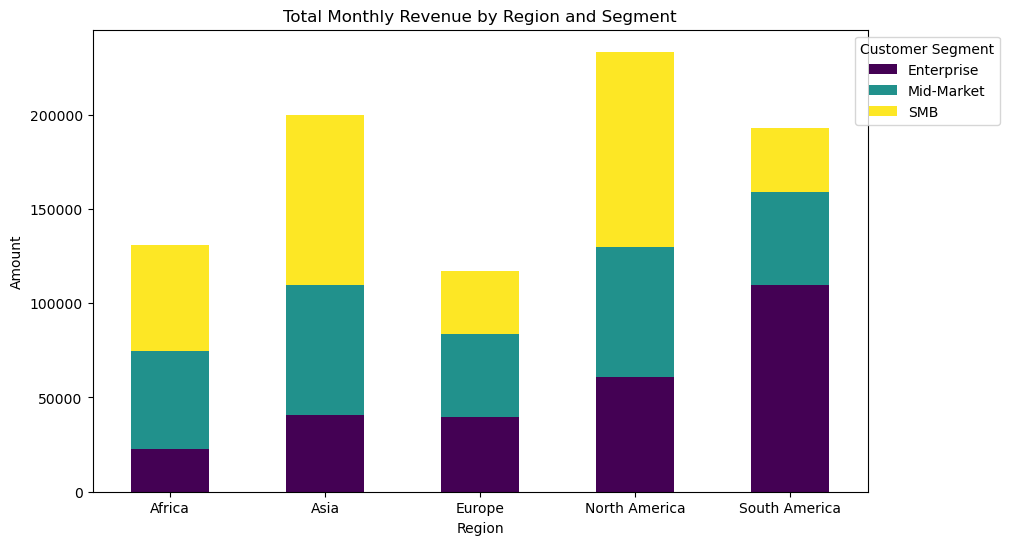

In [4]:
region_segment_revenue = region_segment_df["Total_Monthly_Revenue"].unstack(level="Customer_Segment")
region_segment_revenue.plot(kind="bar", figsize=(10,6), stacked=True, colormap="viridis")
plt.title("Total Monthly Revenue by Region and Segment")
plt.ylabel("Amount")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Customer Segment", bbox_to_anchor=(1.18,1), loc="upper right")
plt.show()

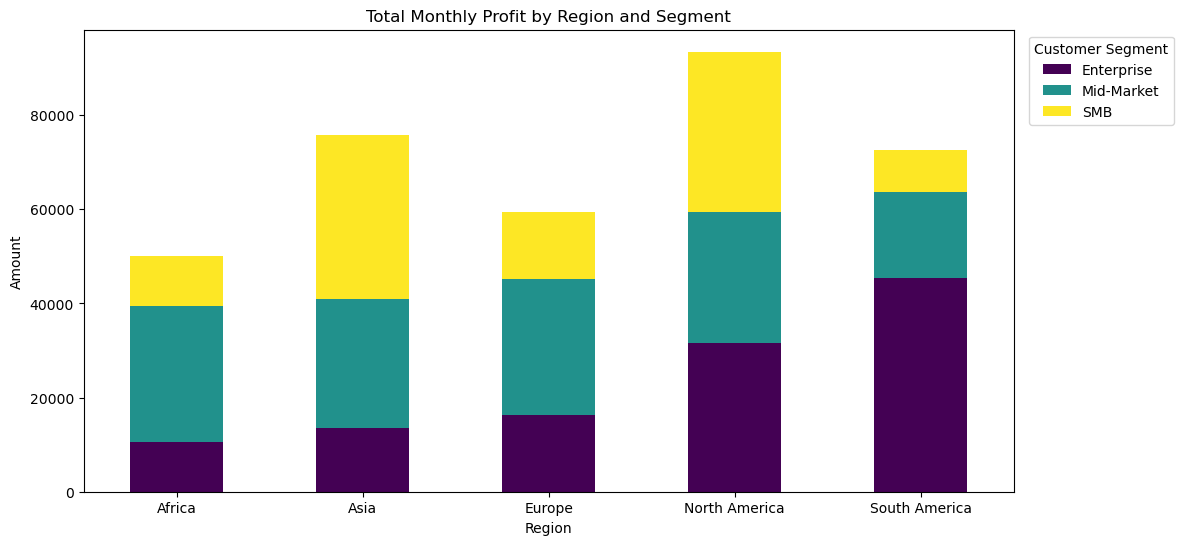

In [5]:
region_segment_profit = region_segment_df["Total_Monthly_Profit"].unstack(level="Customer_Segment")
region_segment_profit.plot(kind="bar", figsize=(12,6), stacked=True, colormap="viridis")
plt.title("Total Monthly Profit by Region and Segment")
plt.ylabel("Amount")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Customer Segment", bbox_to_anchor=(1.18,1), loc="upper right")
plt.show()

In [6]:
pivot_region_revenue = df.pivot_table(
    values="Monthly_Revenue",
    index="Region",
    aggfunc="sum"
)
print(pivot_region_revenue)

               Monthly_Revenue
Region                        
Africa               130965.22
Asia                 199742.50
Europe               117282.61
North America        233382.10
South America        193018.83


In [7]:
pivot_region_segment_revenue = df.pivot_table(
    values="Monthly_Revenue",
    index="Region",
    columns="Customer_Segment",
    aggfunc="sum"
)
print(pivot_region_segment_revenue)
prsr = pivot_revenue_segment_revenue

Customer_Segment  Enterprise  Mid-Market        SMB
Region                                             
Africa              22728.38    51649.26   56587.58
Asia                40715.41    69018.07   90009.02
Europe              39653.09    44087.28   33542.24
North America       61103.81    68763.53  103514.76
South America      109722.08    49084.82   34211.93


NameError: name 'pivot_revenue_segment_revenue' is not defined

In [ ]:
pivot_region_profit_mean = df.pivot_table(
    values="Monthly_Profit",
    index="Region",
    aggfunc="mean"
)
display(pivot_region_profit_mean)
prpm = pivot_region_profit_mean

In [ ]:
pivot_region_segment_profit_mean = df.pivot_table(
    values="Monthly_Profit",
    index="Region",
    columns="Customer_Segment",
    aggfunc="mean"
)
display(pivot_region_segment_profit_mean)
prspm = pivot_region_segment_profit_mean

In [ ]:
prspm.plot(kind="bar", figsize=(10,6), colormap="plasma")
plt.title("Mean Monthly Profit by Region and Segment")
plt.xlabel("Region")
plt.ylabel("Amount in Dollars")
plt.xticks(rotation=0)
plt.legend(title="Customer Segment", bbox_to_anchor=(1.25,1), loc="upper right")
plt.show()

# my colormaps have been limited, here's a few "viridis", "plasma", "cividis", "Spectral", "Reds", "Blues", "Pastel1"

In [9]:
#Continuing with varied pivot table work from now - looking at df to see what we can analyse
df.head()

,Customer_ID,Subscription_Plan,Region,Monthly_Revenue,Monthly_Profit,Churn_Flag,Renewal_Status,Customer_Segment,Signup_Date,Account_Manager
0,CUST0001,Enterprise,South America,9698.09,2515.01,0,Renewed,Mid-Market,2022-10-30,Manager C
1,CUST0002,Basic,Asia,10370.23,1608.20,0,Renewed,SMB,2021-05-13,Manager D
2,CUST0003,Enterprise,Asia,8198.55,2220.95,0,Renewed,Mid-Market,2021-12-13,Manager B
3,CUST0004,Enterprise,North America,6992.86,3933.71,0,Renewed,SMB,2021-07-08,Manager C
4,CUST0005,Basic,Asia,8516.95,3044.23,1,Renewed,Mid-Market,2022-08-01,Manager C


In [19]:
# okay this is good - we can see that the data for Churn_Flag doesn't correspond to the Renewal_Status so fix that first!

df["Churn_Flag"] = df["Renewal_Status"].apply(lambda x:1 if x == "Churned" else 0) # change values
print(df["Renewal_Status"].unique()) # check whether any other values exist (they don't). Let's move on to pivoting

['Renewed' 'Churned']


In [31]:
churn_pivot = df.pivot_table(
    values="Churn_Flag",
    index="Customer_Segment",
    aggfunc="mean"
).rename(columns={
    "Churn_Flag":"Churn_Rate"
})
display(churn_pivot)

,Churn_Rate
Customer_Segment,
Enterprise,0.225806
Mid-Market,0.189189
SMB,0.062500


In [33]:
churn_pivot["Churn_Rate"] = churn_pivot["Churn_Rate"]*100
display(churn_pivot)

,Churn_Rate
Customer_Segment,
Enterprise,22.580645
Mid-Market,18.918919
SMB,6.250000


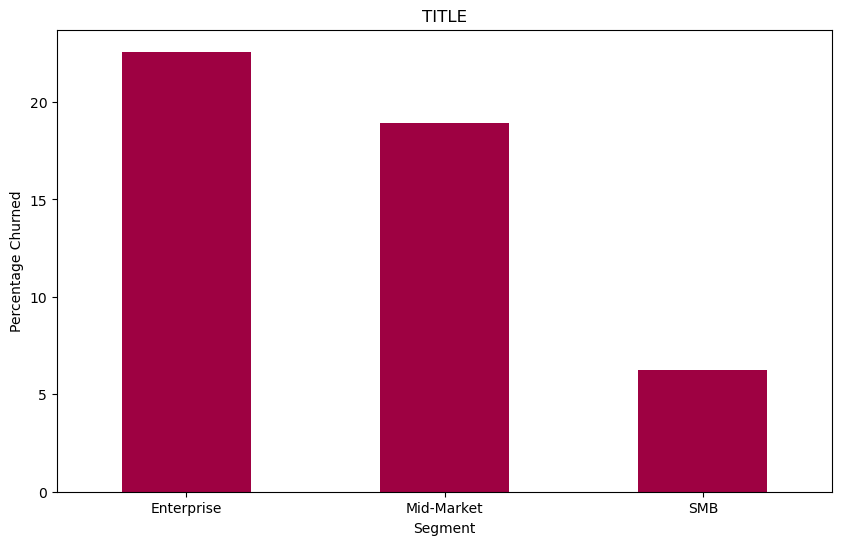

In [43]:
churn_pivot.plot(kind="bar", figsize=(10,6), colormap="Spectral", legend=False)
plt.title("TITLE")
plt.ylabel("Percentage Churned")
plt.xlabel("Segment")
plt.xticks(rotation=0)
plt.show()

In [49]:
df["Profit_Margin"] = df["Monthly_Profit"] / df["Monthly_Revenue"] * 100
df.head()

,Customer_ID,Subscription_Plan,Region,Monthly_Revenue,Monthly_Profit,Churn_Flag,Renewal_Status,Customer_Segment,Signup_Date,Account_Manager,Profit_Margin
0,CUST0001,Enterprise,South America,9698.09,2515.01,0,Renewed,Mid-Market,2022-10-30,Manager C,25.933045
1,CUST0002,Basic,Asia,10370.23,1608.20,0,Renewed,SMB,2021-05-13,Manager D,15.507853
2,CUST0003,Enterprise,Asia,8198.55,2220.95,0,Renewed,Mid-Market,2021-12-13,Manager B,27.089546
3,CUST0004,Enterprise,North America,6992.86,3933.71,0,Renewed,SMB,2021-07-08,Manager C,56.253235
4,CUST0005,Basic,Asia,8516.95,3044.23,0,Renewed,Mid-Market,2022-08-01,Manager C,35.743194


In [51]:
region_plan_pm_pivot = df.pivot_table(
    values="Profit_Margin",
    index="Region",
    columns="Subscription_Plan",
    aggfunc="mean"
)
display(region_plan_pm_pivot)

Subscription_Plan,Basic,Enterprise,Pro
Region,,,
Africa,50.756960,46.696138,77.523373
Asia,42.054418,33.678637,47.720854
Europe,103.008614,40.087143,49.614193
North America,90.971197,78.688186,82.932571
South America,27.165543,58.911796,34.062886


In [65]:
region_plan_pm_pivot.fillna(0, inplace=True)
print(df["Region"].unique())
print(df["Subscription_Plan"].unique())

['South America' 'Asia' 'North America' 'Africa' 'Europe']
['Enterprise' 'Basic' 'Pro']


In [61]:
display(df.groupby("Region")[["Monthly_Revenue", "Monthly_Profit"]].sum())

,Monthly_Revenue,Monthly_Profit
Region,,
Africa,130965.22,50175.99
Asia,199742.50,75705.99
Europe,117282.61,59447.58
North America,233382.10,93463.16
South America,193018.83,72514.55


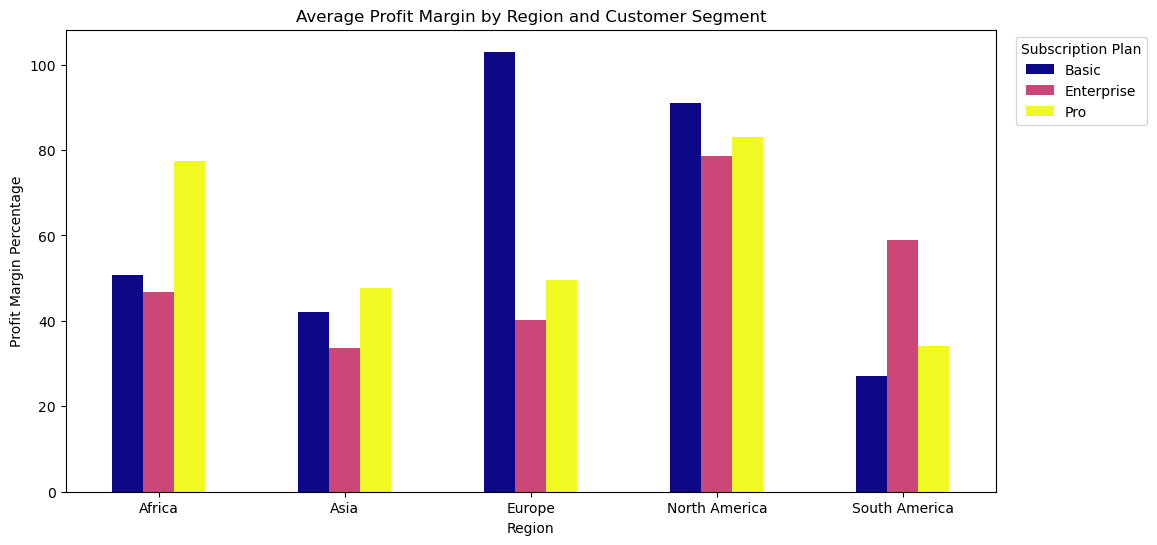

In [59]:
region_plan_pm_pivot.plot(kind="bar", figsize=(12,6), colormap="plasma")
plt.title("Average Profit Margin by Region and Customer Segment")
plt.ylabel("Profit Margin Percentage")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Subscription Plan", bbox_to_anchor=(1.17,1), loc="upper right")
plt.show()

In [ ]:
# Clearly we can see the data above is incorrect. No profit margin is > 100%. Let's try again with pivots alone

In [67]:
region_plan_totals_pivot = df.pivot_table(
    values=["Monthly_Revenue", "Monthly_Profit"],
    index="Region",
    columns="Subscription_Plan",
    aggfunc="sum"
)
display(region_plan_totals_pivot)

Monthly_Profit                      Monthly_Revenue  \
Subscription_Plan          Basic Enterprise       Pro           Basic   
Region                                                                  
Africa                  26521.00   13772.69   9882.30        81161.09   
Asia                    26196.65   13975.84  35533.50        69540.74   
Europe                  23836.47   16572.56  19038.55        31978.09   
North America           23151.09   19588.84  50723.23        67992.54   
South America            8343.96   44500.23  19670.36        42300.86   

                                         
Subscription_Plan Enterprise        Pro  
Region                                   
Africa              35083.14   14720.99  
Asia                48063.99   82137.77  
Europe              43200.99   42103.53  
North America       61047.59  104341.97  
South America       88512.60   62205.37

In [69]:
region_plan_margins_pivot = (region_plan_totals_pivot["Monthly_Profit"] / region_plan_totals_pivot["Monthly_Revenue"]) *100
display(region_plan_margins_pivot)

Subscription_Plan,Basic,Enterprise,Pro
Region,,,
Africa,32.676988,39.257290,67.130675
Asia,37.670939,29.077569,43.260853
Europe,74.540005,38.361528,45.218418
North America,34.049456,32.087819,48.612490
South America,19.725273,50.275588,31.621643


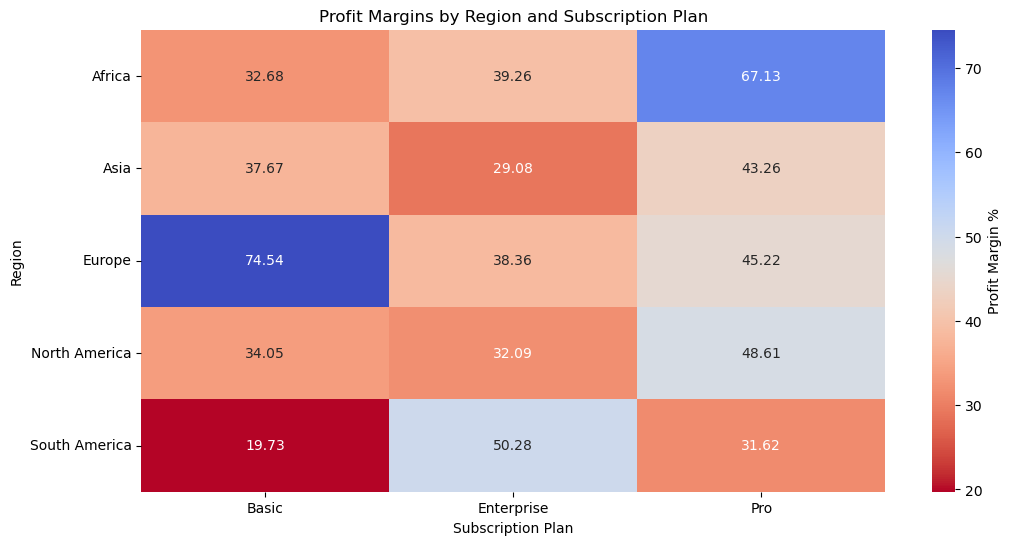

In [81]:
plt.figure(figsize=(12,6))
sns.heatmap(region_plan_margins_pivot, annot=True, fmt=".2f", cmap="coolwarm_r", cbar_kws={"label": "Profit Margin %"})
plt.title("Profit Margins by Region and Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Region")
plt.show()
# new bit of info here, hit the cmap color with a "_r" to invert its application

In [83]:
# the following will be reshaping the pivot table for sns to use properly
region_plan_margins_reset = region_plan_margins_pivot.reset_index().melt(
    id_vars="Region", var_name="Subscription_Plan", value_name="Profit_Margin"
)

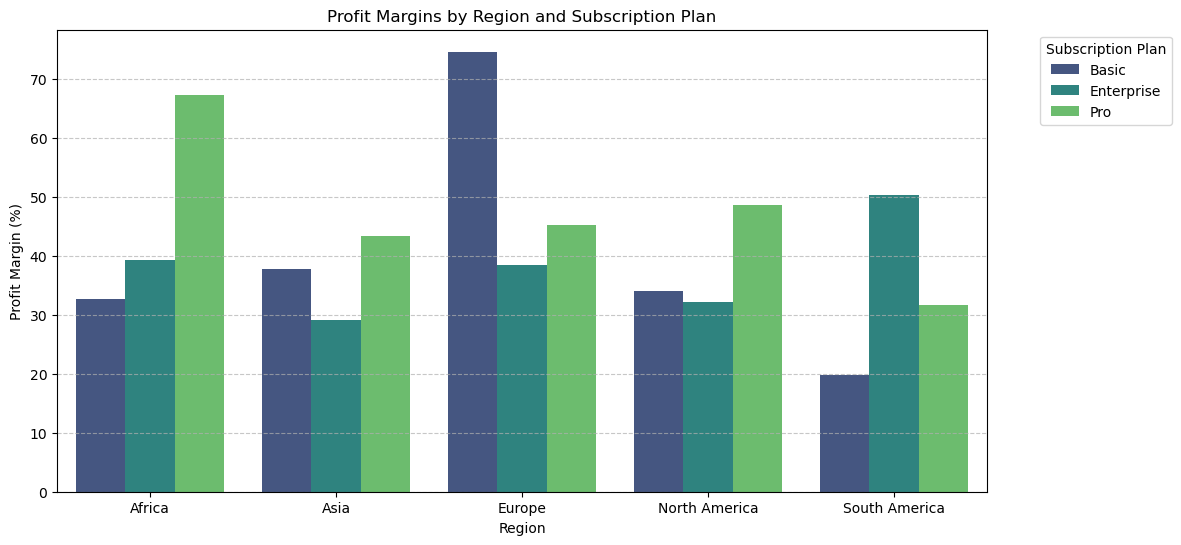

In [87]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=region_plan_margins_reset,
    x="Region",
    y="Profit_Margin",
    hue="Subscription_Plan",
    palette="viridis"
)

plt.title("Profit Margins by Region and Subscription Plan")
plt.ylabel("Profit Margin (%)")
plt.xlabel("Region")
plt.legend(title="Subscription Plan", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#Seaborn barplot is awesome! Definitely going to practice with a few more of these

In [89]:
region_segment_churn = df.pivot_table(
    values="Churn_Flag",
    index="Region",
    columns="Customer_Segment",
    aggfunc="mean"
)
display(region_segment_churn)

Customer_Segment,Enterprise,Mid-Market,SMB
Region,,,
Africa,0.000000,0.142857,0.000000
Asia,0.000000,0.333333,0.000000
Europe,0.500000,0.000000,0.250000
North America,0.142857,0.300000,0.111111
South America,0.333333,0.000000,0.000000


In [91]:
churn_reset = region_segment_churn.reset_index().melt(
    id_vars="Region",
    var_name="Customer_Segment",
    value_name="Churn_Rate"
)
display(churn_reset)

,Region,Customer_Segment,Churn_Rate
0,Africa,Enterprise,0.000000
1,Asia,Enterprise,0.000000
2,Europe,Enterprise,0.500000
3,North America,Enterprise,0.142857
4,South America,Enterprise,0.333333
5,Africa,Mid-Market,0.142857
6,Asia,Mid-Market,0.333333
7,Europe,Mid-Market,0.000000
8,North America,Mid-Market,0.300000
9,South America,Mid-Market,0.000000


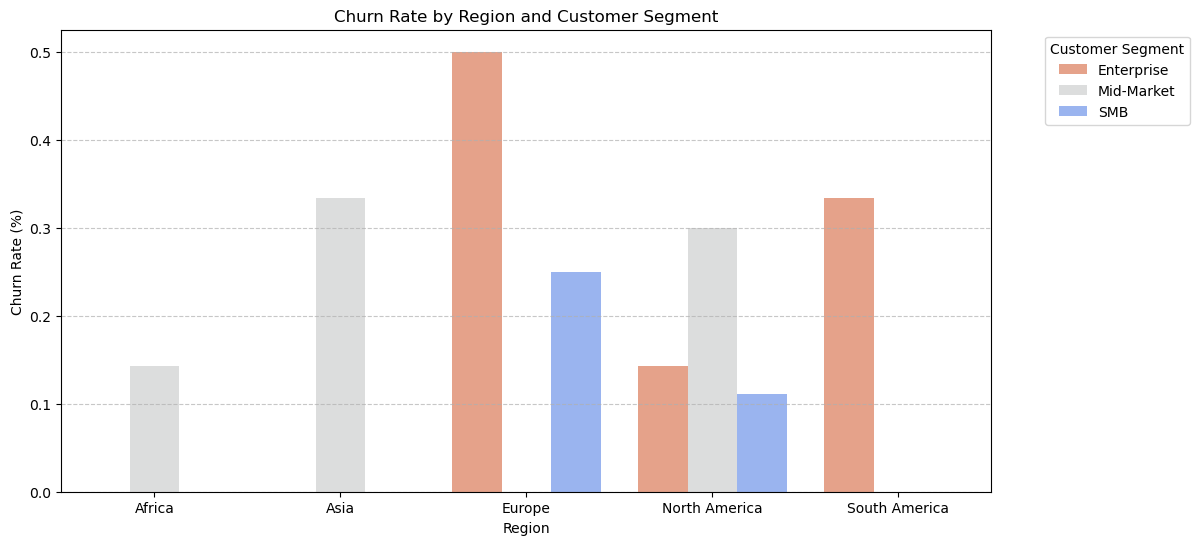

In [93]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=churn_reset,
    x="Region",
    y="Churn_Rate",
    hue="Customer_Segment",
    palette="coolwarm_r"
)
plt.title("Churn Rate by Region and Customer Segment")
plt.xlabel("Region")
plt.ylabel("Churn Rate (%)")
plt.legend(title="Customer Segment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

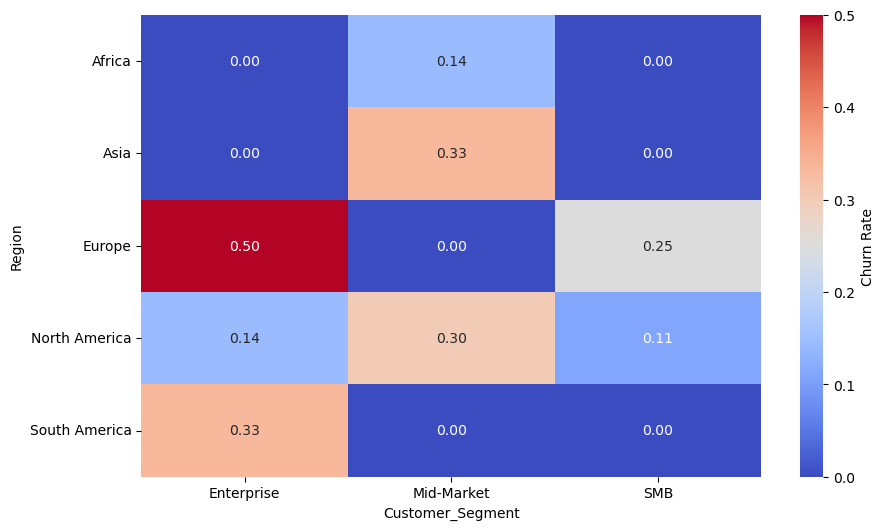

In [100]:
plt.figure(figsize=(10,6))
sns.heatmap(region_segment_churn, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Churn Rate"})
plt.show()